<a href="https://colab.research.google.com/github/sudipta-on/Quantum-Many-Body-Problem-using-Netket/blob/main/Carleo_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of Netket

In [1]:
!pip install --quiet netket

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 649.4/649.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.2/175.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.8/917.8 kB 24.2 MB/s eta 0:00:00


## Ising Model 1D using RBM

In [2]:
import netket as nk
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

# Define the 1D lattice with periodic boundary conditions
L = 20  # System size
hilbert = nk.hilbert.Spin(s=0.5, N=L)

# Define the transverse-field Ising Hamiltonian
graph = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
hamiltonian = nk.operator.Ising(hilbert=hilbert, graph=graph, h=1.0)

# Define the neural network model (RBM)
alpha = 1  # hidden units per visible unit

rbm_model = nk.models.RBM(alpha=alpha)

# Define the Metropolis-Hastings sampler
sampler = nk.sampler.MetropolisLocal(hilbert=hilbert)

# Define the variational state
rbm_vs = nk.vqs.MCState(sampler=sampler, model=rbm_model)

# Define the optimizer
optimizer = nk.optimizer.Sgd(learning_rate=0.1)

# Define the stochastic reconfiguration (SR) method
sr = nk.optimizer.SR(diag_shift=0.1)
rbm_log = nk.logging.RuntimeLog()

# Run the VMC optimization
rbm_gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, variational_state=rbm_vs, preconditioner=sr)

rbm_gs.run(n_iter=500, out=rbm_log)

#defining Jastrow ansatz
jas_model = nk.models.Jastrow()
jas_vs = nk.vqs.MCState(sampler = sampler, model = jas_model)
jas_gs = nk.VMC(hamiltonian = hamiltonian, optimizer = optimizer, variational_state=jas_vs, preconditioner=nk.optimizer.SR(diag_shift = 0.1, holomorphic = True))
jas_log = nk.logging.RuntimeLog()
jas_gs.run(n_iter = 500, out = jas_log)
# Exact solution
sp_h=hamiltonian.to_sparse() # converting the Hamiltonian into a sparse matrix
eig_vals, eig_vecs = eigsh(sp_h, k=2, which="SA")

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


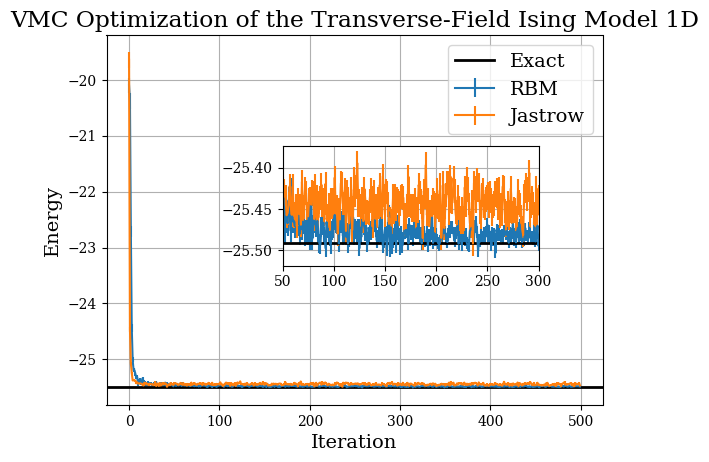

In [3]:
#We now can plot the energy during those optimisation steps:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rc('font', family = 'Serif', size = 14)
matplotlib.rc('xtick', labelsize = 10)
matplotlib.rc('ytick', labelsize = 10)
data_rbm = rbm_log.data["Energy"]
data_jas = jas_log.data["Energy"]
plt.errorbar(data_rbm.iters,data_rbm.Mean,yerr=data_rbm.Sigma,label="RBM")
plt.errorbar(data_jas.iters,data_jas.Mean,yerr=data_jas.Sigma,label="Jastrow")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.title("VMC Optimization of the Transverse-Field Ising Model 1D")
plt.axhline(y=eig_vals[0], xmin=0, xmax=data_rbm.iters[-1], linewidth=2, color="k", label="Exact")
plt.legend()
plt.grid()
sub_axes = plt.axes([0.4,0.4,0.4,0.25])
sub_axes.errorbar(data_rbm.iters[50:], data_rbm.Mean[50:],yerr = data_rbm.Sigma[50:])
sub_axes.errorbar(data_jas.iters[50:], data_jas.Mean[50:],yerr = data_jas.Sigma[50:])
sub_axes.axhline(y=eig_vals[0], xmin=0, xmax=data_rbm.iters[-1], linewidth=2, color="k", label="Exact")
plt.xlim(50,300)
plt.grid()
# plt.axis([50,300, log.data["Energy"]["Mean"][50]+0.05,log.data["Energy"]["Mean"][-1]-0.04])
plt.show()


In [4]:
import netket as nk
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh


Carleo_result_log = {}

def Carleo_result(Nspin,Hfields, Alpha):
    # Define the 1D lattice with periodic boundary conditions
    L = Nspin  # System size
    hilbert = nk.hilbert.Spin(s=0.5, N=L)

    # Define the transverse-field Ising Hamiltonian
    graph = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
    hamiltonian = nk.operator.Ising(hilbert=hilbert, graph=graph, h=1.0)
    Energy = []
    Error = []
    for alpha in Alpha:
      # Define the neural network model (RBM)
      model = nk.models.RBM(alpha=alpha)
      # Define the Metropolis-Hastings sampler
      sampler = nk.sampler.MetropolisLocal(hilbert=hilbert)
      # Define the variational state
      vs = nk.vqs.MCState(sampler=sampler, model=model)
      # Define the optimizer
      optimizer = nk.optimizer.Sgd(learning_rate=0.1)
      # Define the stochastic reconfiguration (SR) method
      sr = nk.optimizer.SR(diag_shift=0.1)
      # Exact solution
      sp_h=hamiltonian.to_sparse() # converting the Hamiltonian into a sparse matrix
      eig_vals, eig_vecs = eigsh(sp_h, k=2, which="SA")
      # Run the VMC optimization
      gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, variational_state=vs, preconditioner=sr)
      file_name = f"Ising_1D_{Nspins}_{Hfield}_{alpha}"

      gs.run(n_iter=500, out=file_name.replace(".",""))
      energy=vs.expect(hamiltonian)
      error=abs((energy.mean-eig_vals[0])/eig_vals[0])
      Energy.append(energy)
      Error.append(error)

      print(f"Result for N_spin : {Nspins}, Hfield : {Hfield}, alpha = {alpha}")
      print(f"Exact Energy : {eig_vals[0]}")
      print(f"Optimized energy : {energy}")
      print(f"relative error   : {error}")

    Carleo_result_log[f"{Nspins}_{Hfield}"] = {
          "Energy" : Energy,
          "Error" : Error
    }

In [5]:
Nspin_list = [20]
Hfield_list = [0.5, 1, 2]
Alpha = [1, 2, 3, 4]

for Nspins in Nspin_list:
  for Hfield in Hfield_list:
    Carleo_result(Nspin=Nspins, Hfields=Hfield, Alpha = Alpha)

  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 0.5, alpha = 1
Exact Energy : -25.490989686364713
Optimized energy : -25.4817 ± 0.0056 [σ²=0.0313, R̂=1.0112]
relative error   : 0.0003658994231873611


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 0.5, alpha = 2
Exact Energy : -25.490989686364795
Optimized energy : -25.4844 ± 0.0045 [σ²=0.0203, R̂=1.0083]
relative error   : 0.0002590749661831293


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 0.5, alpha = 3
Exact Energy : -25.490989686364752
Optimized energy : -25.4891 ± 0.0044 [σ²=0.0198, R̂=1.0068]
relative error   : 7.602376374320964e-05


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 0.5, alpha = 4
Exact Energy : -25.490989686364756
Optimized energy : -25.4928 ± 0.0036 [σ²=0.0133, R̂=1.0117]
relative error   : 7.176505568365928e-05


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 1, alpha = 1
Exact Energy : -25.490989686364763
Optimized energy : -25.4884 ± 0.0056 [σ²=0.0317, R̂=1.0114]
relative error   : 0.00010024883500864643


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 1, alpha = 2
Exact Energy : -25.490989686364685
Optimized energy : -25.4827 ± 0.0051 [σ²=0.0260, R̂=1.0058]
relative error   : 0.00032668345790393653


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 1, alpha = 3
Exact Energy : -25.490989686364745
Optimized energy : -25.4813 ± 0.0039 [σ²=0.0154, R̂=1.0132]
relative error   : 0.0003795147787348527


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 1, alpha = 4
Exact Energy : -25.490989686364642
Optimized energy : -25.4935 ± 0.0038 [σ²=0.0146, R̂=1.0066]
relative error   : 9.759964613430163e-05


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 2, alpha = 1
Exact Energy : -25.49098968636474
Optimized energy : -25.4900 ± 0.0059 [σ²=0.0356, R̂=1.0056]
relative error   : 3.699476510861174e-05


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 2, alpha = 2
Exact Energy : -25.490989686364802
Optimized energy : -25.4869 ± 0.0042 [σ²=0.0179, R̂=1.0090]
relative error   : 0.00015940822734240574


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 2, alpha = 3
Exact Energy : -25.490989686364735
Optimized energy : -25.4798 ± 0.0043 [σ²=0.0183, R̂=1.0161]
relative error   : 0.0004391971903326738


  0%|          | 0/500 [00:00<?, ?it/s]

Result for N_spin : 20, Hfield : 2, alpha = 4
Exact Energy : -25.49098968636467
Optimized energy : -25.4884 ± 0.0039 [σ²=0.0154, R̂=1.0050]
relative error   : 0.00010322192816442469


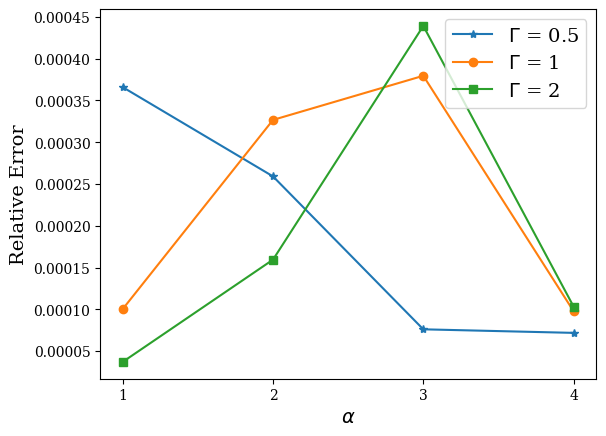

In [6]:
# ploting relative errors

# For N_spins = 20,
errors_H_05 = Carleo_result_log["20_0.5"]["Error"]
errors_H_1 = Carleo_result_log["20_1"]["Error"]
errors_H_2 = Carleo_result_log["20_2"]["Error"]
# errors_H_25 = Carleo_result_log["20_0.25"]["Error"]

# plt.errorbar(alpha, errors_H_25,marker = "o", label="$\Gamma$ = 0.25")
plt.errorbar(Alpha, errors_H_05, marker = "*",label="$\Gamma$ = 0.5")
plt.errorbar(Alpha, errors_H_1, marker = "o",label="$\Gamma$ = 1")
plt.errorbar(Alpha, errors_H_2, marker = "s",label="$\Gamma$ = 2")
plt.legend()
plt.xlabel("$\\alpha$")
plt.ylabel('Relative Error')
# plt.ylim(0,0.02)
plt.xticks(Alpha)
plt.show()


Disclaimer: We have tried for 20 spins whereas Carlo performed the experiment for 80 spins system in Supercomputer. Due to lack of computational power we are only able to perform this experiment for 20 spins system, not for 40 spins or 80 spins systems.

In [7]:
Nspin_list = [40] # Looks we use now Nspins = 40 it raise error
Hfield_list = [0.5, 1, 2]
Alpha = [1, 2, 3, 4]

for Nspins in Nspin_list:
  for Hfield in Hfield_list:
    Carleo_result(Nspin=Nspins, Hfields=Hfield, Alpha = Alpha)

RuntimeError: The hilbert space is too large to be indexed.

/usr/local/lib/python3.10/dist-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1000 (1000 per device/MPI rank) does not divide n_chains=16, increased to 1008 (1008 per device/MPI rank)
  self.n_samples = n_samples


  0%|          | 0/600 [00:00<?, ?it/s]

### RBM calculation
Has 440 parameters
The RBM calculation took 49.9362678527832 seconds
Optimized energy : -35.589 ± 0.014 [σ²=0.191, R̂=1.0124]
relative error   : 0.0007897160728428101


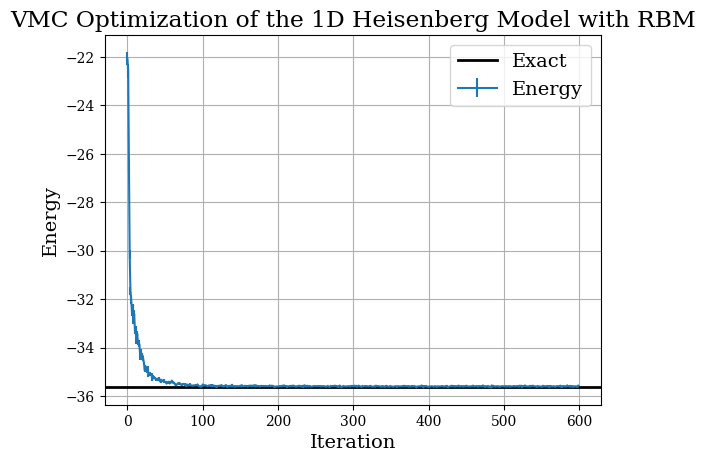

In [8]:
import netket as nk
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
import time

# Define the 1D lattice with periodic boundary conditions
L = 20  # System size
edges = [(i, (i + 1) % L) for i in range(L)]
graph = nk.graph.Graph(edges=edges)
# Defining Hilbert Space
hi = nk.hilbert.Spin(s = 0.5, total_sz = 0, N = graph.n_nodes)
# Define the 1D Heisenberg Hamiltonian
ha = nk.operator.Heisenberg(hilbert=hi, graph=graph)

# Exact solution
sp_h=ha.to_sparse() # converting the Hamiltonian into a sparse matrix
eig_vals, eig_vecs = eigsh(sp_h, k=2, which="SA")
exact_gs_energy = eig_vals[0]

# Define the Jastrow model
model = nk.models.RBM(alpha = 1)

# RBM ansatz with alpha=1
ma = nk.models.RBM(alpha=1)

# Build the sampler
sa = nk.sampler.MetropolisExchange(hilbert=hi,graph=graph)

# Optimizer
op = nk.optimizer.Sgd(learning_rate=0.05)

# Stochastic Reconfiguration
sr = nk.optimizer.SR(diag_shift=0.1)

# The variational state
vs = nk.vqs.MCState(sa, ma, n_samples=1000)

# The ground-state optimization loop
gs = nk.VMC(
    hamiltonian=ha,
    optimizer=op,
    preconditioner=sr,
    variational_state=vs)

log = nk.logging.RuntimeLog()
start = time.time()
gs.run(out=log, n_iter=600)
end = time.time()

rbm_energy = vs.expect(ha)
rbm_error = abs((rbm_energy.mean - exact_gs_energy)/exact_gs_energy)
rbm_time = end-start
print('### RBM calculation')
print('Has',vs.n_parameters,'parameters')
print('The RBM calculation took',rbm_time,'seconds')
print(f"Optimized energy : {rbm_energy}")
print(f"relative error   : {rbm_error}")

data_hb = log.data["Energy"]

plt.errorbar(data_hb.iters, data_hb.Mean, yerr=data_hb.Sigma, label="Energy")
plt.axhline(y=eig_vals[0], xmin=0, xmax=data_hb.iters[-1], linewidth=2, color="k", label="Exact")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.title("VMC Optimization of the 1D Heisenberg Model with RBM")
plt.legend()
plt.grid()
plt.show()

In [9]:
import netket as nk
import numpy as np
import matplotlib.pyplot as plt

# Define the Hilbert space for an 8-site spin chain with spin-1/2 particles
hilbert = nk.hilbert.Spin(s=0.5, N=8)

# Define the Heisenberg Hamiltonian with periodic boundary conditions
edges = [[i, (i + 1) % 8] for i in range(8)]
graph = nk.graph.Graph(edges=edges)
ha = nk.operator.Heisenberg(hilbert=hilbert, graph=graph)

# Define the RBM wave function model
rbm = nk.models.RBM(alpha=1)

# Define the variational state
vs = nk.vqs.MCState(nk.sampler.MetropolisLocal(hilbert=hilbert), model=rbm)

# Save initial parameters
initial_params = vs.parameters

# Define the optimizer
optimizer = nk.optimizer.Sgd(learning_rate=0.1)

# Define the driver
gs = nk.VMC(hamiltonian=ha, optimizer=optimizer, variational_state=vs)

# Run the optimization
n_iter = 300
gs.run(n_iter=n_iter)

# Save optimized parameters
optimized_params = vs.parameters

initial_params = initial_params["Dense"]['kernel']
optimized_params = optimized_params["Dense"]['kernel']

  0%|          | 0/300 [00:00<?, ?it/s]

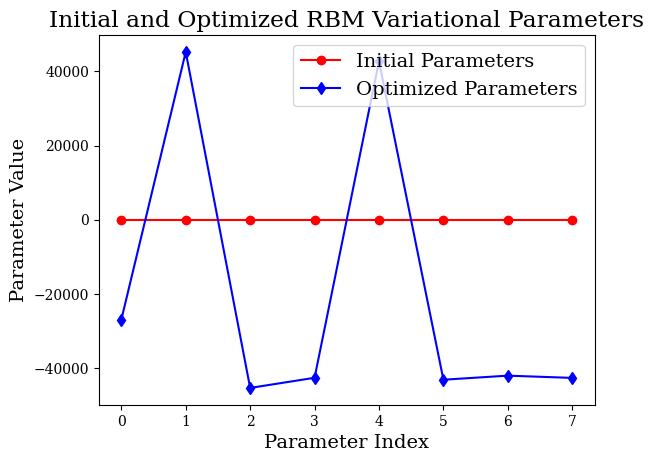

In [10]:
# Plot initial and optimized RBM parameters

plt.plot(initial_params[0], 'ro-',label='Initial Parameters')
plt.plot(optimized_params[0], 'bd-',label='Optimized Parameters')
plt.xlabel('Parameter Index')
plt.ylabel('Parameter Value')
plt.legend()
plt.title('Initial and Optimized RBM Variational Parameters')
plt.show()
